In [3]:
import numpy as np 
import pandas as pd 
import math
import random
import seaborn as sns  
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
gender_submission = pd.read_csv('/home/slay/kaggle/Titanic: Machine Learning from Disaster/titanic/gender_submission.csv')
test = pd.read_csv('/home/slay/kaggle/Titanic: Machine Learning from Disaster/titanic/test.csv')
train = pd.read_csv('/home/slay/kaggle/Titanic: Machine Learning from Disaster/titanic/train.csv')

In [5]:
X_train = train.reset_index()
X_test = test.reset_index()
Y = train.Survived

X_dropna = X_train.dropna()
X_test_dropna = X_test.dropna()

In [6]:
print(X_train.isnull().sum())
print(X_test.isnull().sum())

index            0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
index            0
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [7]:
X_train['famous_cabin'] = X_train["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
X_test['famous_cabin'] = X_test["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
X_train['Embarked'] = X_train['Embarked'].fillna('S')
X_test['Fare'] = X_test['Fare'].fillna(X_test['Fare'].median())
X_train['Name_length'] = X_train['Name'].apply(len)
X_test['Name_length'] = X_test['Name'].apply(len)

In [8]:
for i in X_train.loc[(X_train['famous_cabin']==1)].index:
    st = str(X_train.iloc[i, 11:12])[9:10]
    if st == 'A':
        X_train.at[i, 'deck_number'] = 1
    elif st == 'B':
        X_train.at[i, 'deck_number'] = 2
    elif st == 'C':
        X_train.at[i, 'deck_number'] = 3
    elif st == 'D':
        X_train.at[i, 'deck_number'] = 4
    elif st == 'E': 
        X_train.at[i, 'deck_number'] = 5
    elif st == 'F':
        X_train.at[i, 'deck_number'] = 6
    elif st == 'G':
        X_train.at[i, 'deck_number'] = 7
    elif st == 'T':
        X_train.at[i, 'deck_number'] = 8 

X_train['deck_number'] = X_train['deck_number'].fillna(0)

In [9]:
for i in X_test.loc[(X_test['famous_cabin']==1)].index:
    st = str(X_test.iloc[i, 10:11])[9:10]
    if st == 'A':
        X_test.at[i, 'deck_number'] = 1
    elif st == 'B':
        X_test.at[i, 'deck_number'] = 2
    elif st == 'C':
        X_test.at[i, 'deck_number'] = 3
    elif st == 'D':
        X_test.at[i, 'deck_number'] = 4
    elif st == 'E': 
        X_test.at[i, 'deck_number'] = 5
    elif st == 'F':
        X_test.at[i, 'deck_number'] = 6
    elif st == 'G':
        X_test.at[i, 'deck_number'] = 7
    elif st == 'T':
        X_test.at[i, 'deck_number'] = 8 

X_test['deck_number'] = X_test['deck_number'].fillna(0)

In [10]:
X_train.head(2)

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,famous_cabin,Name_length,deck_number
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,23,0.0
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,51,3.0


In [11]:
X_test.head(2)

,index,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,famous_cabin,Name_length,deck_number
0,0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,16,0.0
1,1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,32,0.0


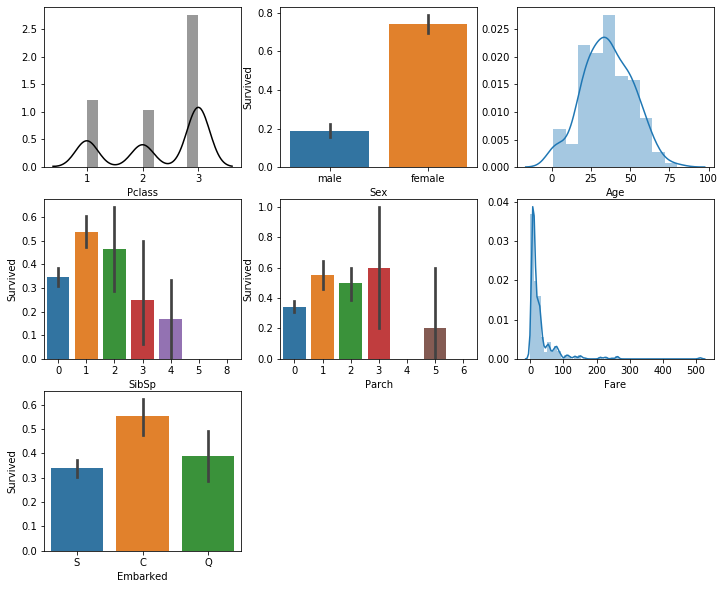

In [12]:
plt.figure(figsize=[12,10])

plt.subplot(331)
sns.distplot(X_train['Pclass'], color="k")

plt.subplot (332)                         
sns.barplot('Sex', 'Survived', data=X_train)

plt.subplot (333)
sns.distplot(X_dropna['Age']) # распределение всего извстного возраста на титанике

plt.subplot (334)
#sns.distplot(X['SibSp'])
sns.barplot('SibSp', 'Survived', data=X_train)

plt.subplot (335)
#sns.distplot(X['Parch'])
#px.histogram(X, x="Parch").show()
sns.barplot('Parch', 'Survived', data=X_train)

plt.subplot (336)
sns.distplot(X_train['Fare'])
#train['Fare'].hist()

plt.subplot (337)
sns.barplot('Embarked', 'Survived', data=X_train)

In [13]:
X_dropna_categor = pd.get_dummies(X_dropna) 
Xtest_dropna_categor = pd.get_dummies(X_test_dropna) 

# Surviving girls:
Sex_female_Survived = X_dropna_categor.loc[(X_dropna_categor.Sex_female == 1) & (X_dropna_categor.Survived == 1)]
# Dead girls:
Sex_female_NoSurvived = X_dropna_categor.loc[(X_dropna_categor.Sex_female == 1) & (X_dropna_categor.Survived == 0)]
# Surviving guys:
X_Sex_male_Survived = X_dropna_categor.loc[(X_dropna_categor.Sex_male == 1) & (X_dropna_categor.Survived == 1)] 
# Dead guys:
X_Sex_male_NoSurvived = X_dropna_categor.loc[(X_dropna_categor.Sex_male == 1) & (X_dropna_categor.Survived == 0)]

X_test_male = Xtest_dropna_categor.loc[Xtest_dropna_categor.Sex_male == 1]
X_test_female = Xtest_dropna_categor.loc[Xtest_dropna_categor.Sex_female == 1]

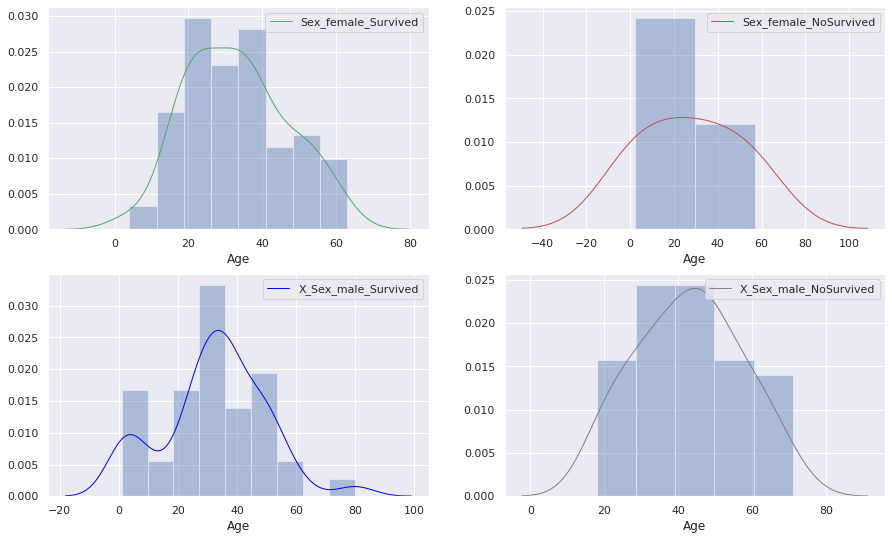

In [14]:
# age distribution of survivors and non-survivors:
sns.set(rc={'figure.figsize': (15, 9)})
plt.subplot (221)
sns.distplot(Sex_female_Survived['Age'] , kde_kws = {'color': 'g', 'lw':1, 'label': 'Sex_female_Survived' })
plt.subplot (222)
sns.distplot(Sex_female_NoSurvived['Age'] , kde_kws = {'color': 'r', 'lw':1, 'label': 'Sex_female_NoSurvived' })
plt.subplot (223)
sns.distplot(X_Sex_male_Survived['Age'] , kde_kws = {'color': 'blue', 'lw':1, 'label': 'X_Sex_male_Survived' })
plt.subplot (224)
sns.distplot(X_Sex_male_NoSurvived['Age'] , kde_kws = {'color': 'gray', 'lw':1, 'label': 'X_Sex_male_NoSurvived' })

In [15]:
female_Survived_mean, female_NoSurvived_mean = Sex_female_Survived['Age'].mean(), Sex_female_NoSurvived['Age'].mean()
male_Survived_mean, male_NoSurvived_mean = X_Sex_male_Survived['Age'].mean(), X_Sex_male_NoSurvived['Age'].mean()

female_Survived_std, female_NoSurvived_std = Sex_female_Survived['Age'].std(), Sex_female_NoSurvived['Age'].std()
male_Survived_std, male_NoSurvived_std = X_Sex_male_Survived['Age'].std(), X_Sex_male_NoSurvived['Age'].std()

female_std, female_mean = X_test_female['Age'].std(), X_test_female['Age'].mean()
male_std, male_mean = X_test_male['Age'].std(), X_test_male['Age'].mean()

In [16]:
# Confidence interval calculation function: 
def derf(sample, mean, std):
    age_shape = sample['Age'].shape[0] # sample size
    standard_error_ofthe_mean = std / math.sqrt(age_shape)
    random_mean = random.uniform(mean-(1.96*standard_error_ofthe_mean), mean+(1.96*standard_error_ofthe_mean))
    return round(random_mean, 2)    

In [17]:
for i in X_train.loc[(X_train['Sex']=='female') & (X_train['Survived']==1) & (X_train['Age'].isnull())].index:
    X_train.at[i, 'Age'] = derf(Sex_female_Survived, female_Survived_mean, female_Survived_std)

for h in X_train.loc[(X_train['Sex']=='female') & (X_train['Survived']==0) & (X_train['Age'].isnull())].index:
    X_train.at[h, 'Age'] = derf(Sex_female_NoSurvived, female_NoSurvived_mean, female_NoSurvived_std)
    
for l in X_train.loc[(X_train['Sex']=='male') & (X_train['Survived']==1) & (X_train['Age'].isnull())].index:
    X_train.at[l, 'Age'] = derf(X_Sex_male_Survived, male_Survived_mean, male_Survived_std)
    
for b in X_train.loc[(X_train['Sex']=='male') & (X_train['Survived']==0) & (X_train['Age'].isnull())].index:
    X_train.at[b, 'Age'] = derf(X_Sex_male_NoSurvived, male_NoSurvived_mean, male_NoSurvived_std)
    
for p in X_test.loc[(X_test['Sex']=='male') & (X_test['Age'].isnull())].index:
    X_test.at[p, 'Age'] = derf(X_test_male, male_mean, male_std)

for y in X_test.loc[(X_test['Sex']=='female') & (X_test['Age'].isnull())].index:
    X_test.at[y, 'Age'] = derf(X_test_female, female_mean, female_std)


In [18]:
print(X_train.isnull().sum())
print(X_test.isnull().sum())

index             0
PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          0
famous_cabin      0
Name_length       0
deck_number       0
dtype: int64
index             0
PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           327
Embarked          0
famous_cabin      0
Name_length       0
deck_number       0
dtype: int64


In [19]:
X_train = X_train.drop(['Survived', 'Name', 'Ticket', 'Cabin', 'index'], axis=1) 
X_test = X_test.drop(['Name', 'Ticket', 'Cabin', 'index'], axis=1)
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [20]:
X_train.head(2)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,famous_cabin,Name_length,deck_number,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,0,23,0.0,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,51,3.0,1,0,1,0,0


In [21]:
X_test.head(2)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,famous_cabin,Name_length,deck_number,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,0,16,0.0,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,0,32,0.0,1,0,0,0,1


In [22]:
Y.head(4)

0    0
1    1
2    1
3    1
Name: Survived, dtype: int64

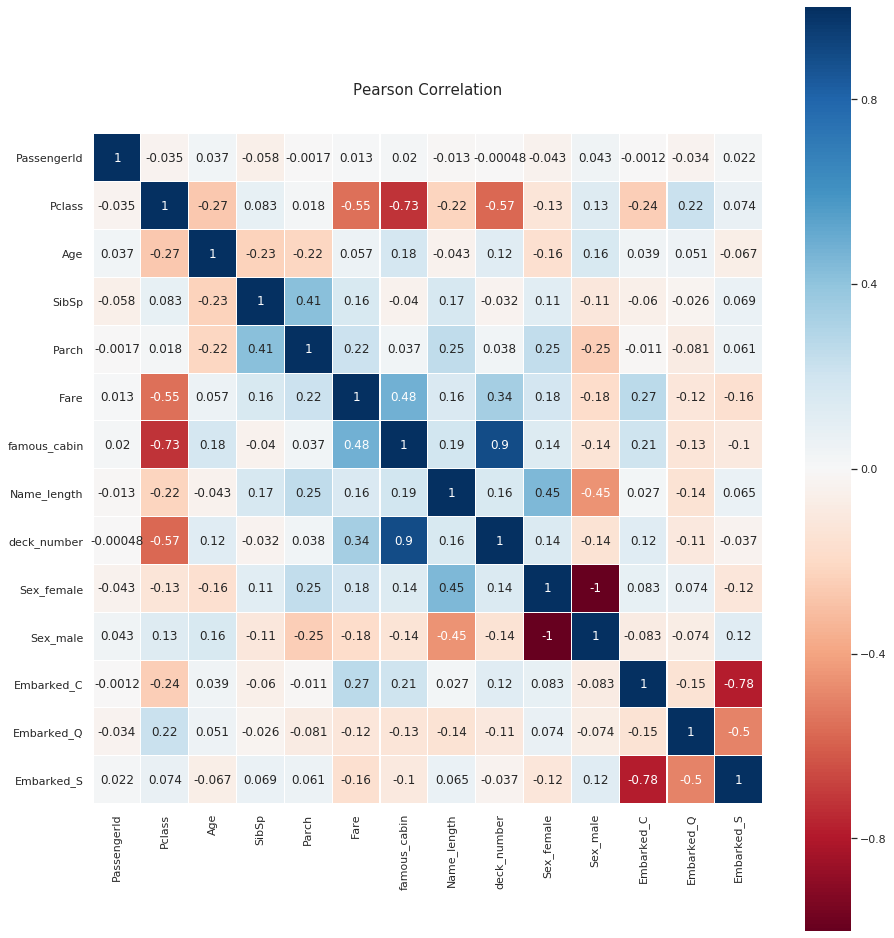

In [23]:
cor_map = plt.cm.RdBu
plt.figure(figsize=(15,17))
plt.title('Pearson Correlation', y=1.05, size=15)
sns.heatmap(X_train.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=cor_map, linecolor='white', annot=True)  

In [26]:
#import pandas_profiling

In [25]:
#X_train.profile_report()

In [27]:
from sklearn import tree

#from sklearn.tree import DecisionTreeClassifier
#from sklearn.tree import ExtraTreeClassifier
#from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import GridSearchCV 
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import precision_score    

In [28]:
clf = tree.DecisionTreeClassifier()
Eclf = tree.ExtraTreeClassifier()

Ec_regr = tree.ExtraTreeRegressor()
des_regr = tree.DecisionTreeRegressor()

mas_Clas = ['clf', 'Eclf']
mas_regr = ['Ec_regr', 'des_regr']

In [32]:
parametrs_clf = {'criterion': ['gini', 'entropy'], 'max_depth': range(2, 15), 'min_samples_split': range(59,70), 
             'min_samples_leaf': range(10,20)} 

parametrs_Eclf = {'criterion': ['gini', 'entropy'], 'max_depth': range(2, 20), 'min_samples_split': range(59,70), 
             'min_samples_leaf': range(10,20)} 

parametrs_Ec_regr = {'criterion': ['mae', 'friedman_mse'], 'max_depth': range(3, 10), 'min_samples_split': range(59,70), 
             'min_samples_leaf': range(10,20)} 

parametrs_des_regr = {'criterion': ['mae', 'friedman_mse'], 'max_depth': range(2, 10), 'min_samples_split': range(59,70), 
             'min_samples_leaf': range(10,20)} 

In [33]:
mas_tree_Clas = {clf: parametrs_clf, Eclf: parametrs_Eclf}
mas_tree_regr = {Ec_regr: parametrs_Ec_regr, des_regr: parametrs_des_regr}

In [34]:
d_tree_Clas = {}
t = 0
for tree in mas_tree_Clas:
    grid_search_cv_clf = GridSearchCV(tree, mas_tree_Clas[tree], cv=5)
    grid_search_cv_clf.fit(X_train, Y)
    print(grid_search_cv_clf.best_params_)
    best_clf = grid_search_cv_clf.best_estimator_
    best_clf.fit(X_train, Y)
    y_predicted_prob = best_clf.predict(X_test)
    y_predicted_prob = list(y_predicted_prob)
    d_tree_Clas[mas_Clas[t]]=y_predicted_prob
    t+=1
print('final')

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 59}
{'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 14, 'min_samples_split': 69}
final


/home/slay/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



In [35]:
d_tree_regr = {}
h = 0
for tree in mas_tree_regr:
    grid_search_cv_clf = GridSearchCV(tree, mas_tree_regr[tree], cv=5)
    grid_search_cv_clf.fit(X_train, Y)
    print(grid_search_cv_clf.best_params_)
    best_clf = grid_search_cv_clf.best_estimator_
    best_clf.fit(X_train, Y)
    y_predicted_prob = best_clf.predict(X_test)
    y_predicted_prob = list(y_predicted_prob)
    d_tree_regr[mas_regr[h]]=y_predicted_prob
    h+=1
print('final')

/home/slay/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



{'criterion': 'friedman_mse', 'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 61}
{'criterion': 'friedman_mse', 'max_depth': 4, 'min_samples_leaf': 19, 'min_samples_split': 68}
final


/home/slay/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



In [36]:
temp_y = pd.DataFrame.from_dict({
    'clf': d_tree_Clas['clf'],
    'Eclf': d_tree_Clas['Eclf'],
    'Ec_regr': d_tree_regr['Ec_regr'],
    'des_regr': d_tree_regr['des_regr']})

In [37]:
temp_y['sum'] = temp_y.sum(axis=1)

In [38]:
temp_y.head(2)

,clf,Eclf,Ec_regr,des_regr,sum
0,0,0,0.095890,0.167315,0.263206
1,1,0,0.276596,0.492063,1.768659


In [128]:
temp_y['Submission'] = temp_y["sum"].apply(lambda x: 1 if x > 3.7 else 0)

In [129]:
temp_y.head(7)

,clf,Eclf,Ec_regr,des_regr,sum,Submission
0,0,0,0.095890,0.167315,0.263206,0
1,1,0,0.276596,0.492063,1.768659,0
2,0,0,0.033333,0.042781,0.076114,0
3,0,0,0.095890,0.167315,0.263206,0
4,1,0,0.276596,0.492063,1.768659,0
5,0,0,0.437500,0.167315,0.604815,0
6,1,1,0.696429,0.703704,3.400132,0


In [130]:
from sklearn.metrics import precision_score 
##################################precision score #########################################################
y_true = pd.read_csv('/home/slay/Рабочий стол/submission.csv').Survived
y_pred = temp_y.Submission
precision_score(y_true, y_pred)

0.9230769230769231

In [88]:
finall_F = pd.DataFrame.from_dict({'PassengerId': list(test.PassengerId), 'Survived': list(temp_y.Submission)})

In [89]:
finall_F.head(2)

,PassengerId,Survived
0,892,0
1,893,1


In [ ]:
finall_F.to_csv("Submission4.csv", index=False)